# Varied Accuracy Plots

In [11]:
import numpy as np
import pandas as pd

from security_games.clinch import clinch
from security_games.utils import SSG, Polytope

In [12]:
def test_clinch(n_targets=3, epsilon=1e-8):
    dimension = n_targets
    simplex_A = np.concatenate([-np.eye(dimension), np.ones((1, dimension))])
    simplex_b = np.concatenate([np.zeros((dimension, 1)), np.ones((1, 1))])
    simplex = Polytope(simplex_A, simplex_b)

    values_1 = [np.random.uniform() for _ in range(n_targets)]
    values_2 = [np.random.uniform() for _ in range(n_targets)]
    game = SSG(
        n_targets,
        simplex,
        np.array([[0.0, value] for value in values_1]).T,
        np.array([[value, 0.0] for value in values_2]).T,
    )
    _ = clinch(game, clinch_simplex=True, epsilon=epsilon, verbose=False)
    return game.call_count

In [16]:
# run searches
n = 10
iters = 3
results = []
for i in range(2,12):
    count = 0
    for j in range(iters):
        count += test_clinch(n, 10**(-i))
    count /= iters
    results.append((i, count))

Text(0.5, 1.0, 'Query complexity vs. accuracy, n=10')

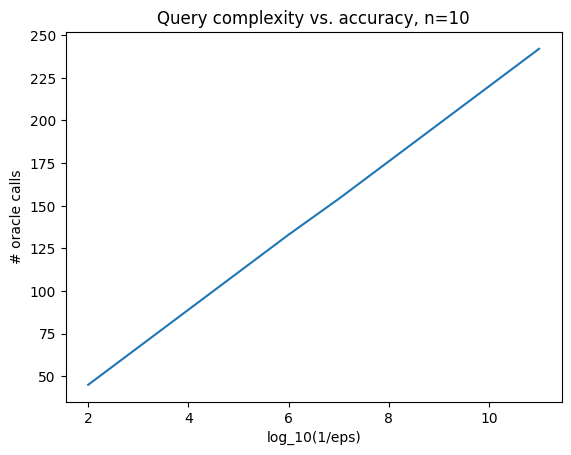

In [20]:
# plot search results
import matplotlib.pyplot as plt
plt.plot([r[0] for r in results], [r[1] for r in results])
plt.ylabel('# oracle calls')
plt.xlabel('log_10(1/eps)')
plt.title('Query complexity vs. accuracy, n=10')